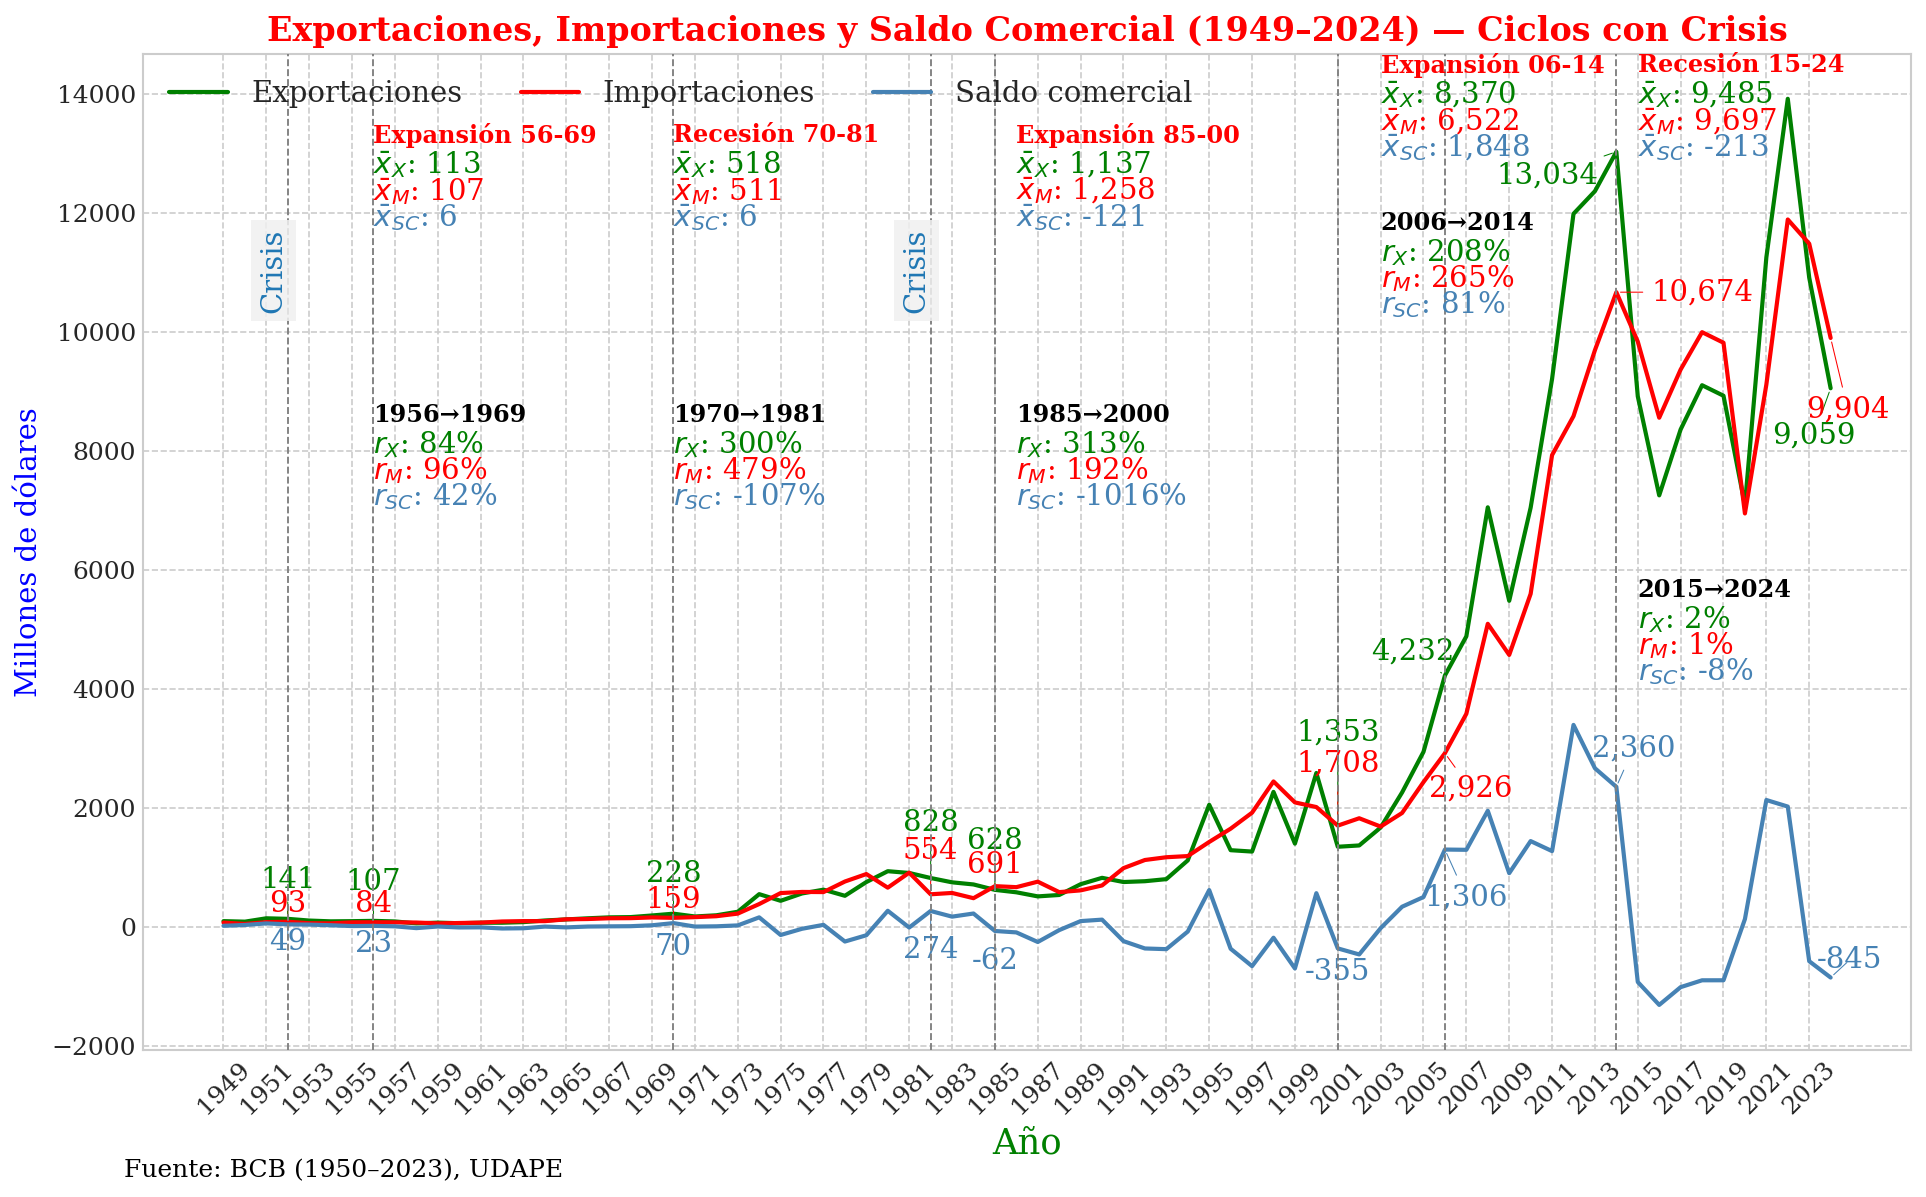

In [24]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from graficos_utils import (
    set_style,
    init_base_plot,
    add_hitos,
    add_cycle_means_multi,
    add_year_value_annotations,
    add_period_growth_annotations_multi,
    adjust_annot_years,
    adjust_cycles,
    adjust_periods,
)
from config import CYCLES, annot_years, periodos_tasas, hitos_v  # configuración centralizada :contentReference[oaicite:0]{index=0}

# 1. Configuración Global
output_dir = "../../../assets/tesis/serie_completa/balanza_comercial"
os.makedirs(output_dir, exist_ok=True)
set_style()  # aplica estilo corporativo :contentReference[oaicite:1]{index=1}

# 2. Carga de Datos
with sqlite3.connect("../../../db/proyectomacro.db") as conn:
    df = (
        pd.read_sql("SELECT * FROM balanza_comercial", conn, index_col="año")
          .sort_index()
    )

# 3. Componentes y Abreviaturas
componentes = [
    ("exportaciones",   "Exportaciones"),
    ("importaciones",   "Importaciones"),
    ("saldo_comercial", "Saldo comercial"),
]
cols = [col for col, _ in componentes]
abbr_map = {
    "exportaciones":   "X",
    "importaciones":   "M",
    "saldo_comercial": "SC",
}
colors = {
    "exportaciones":   "green",
    "importaciones":   "red",
    "saldo_comercial": "steelblue",
}

# 4. Preparación de Ciclos y Anotaciones
annotate_years = adjust_annot_years(df, annot_years)
cycles = adjust_cycles(df, CYCLES)
cycle_stats = {
    name: df.loc[period, cols].mean().to_dict()
    for name, period in cycles.items()
}
periods = adjust_periods(df, periodos_tasas)

# 5. Offsets y Posicionamientos
annotation_offsets = {
    "exportaciones": {
        1952: (0,   660),
        1956: (0,   660),
        1970: (0,   660),
        1982: (0,   920),
        1985: (0,   820),
        2001: (0,  1920),
        2006: (-1.5, 400),
        2014: (-3.2,  -400),
        2024: (-0.8, -800),
    },
    "importaciones": {
        1952: (0,   300),
        1956: (0,   300),
        1970: (0,   300),
        1982: (0,   720),
        1985: (0,   350),
        2001: (0,   1040),
        2006: (1.2, -600),
        2014: (4,     0),
        2024: (0.8, -1200),
    },
    "saldo_comercial": {
        1952: (0.0, -300),
        1956: (0.0, -300),
        1970: (0.0, -400),
        1982: (0.0, -650),
        1985: (0.0, -500),
        2001: (0.0, -400),
        2006: (1,   -800),
        2014: (0.8,  650),
        2024: (0.9,  300),
    },
}

hitos_offset = {year: 0.8 for year in hitos_v}

medias_offsets = {
    "Expansión 56-69": (1956, 0.92),
    "Recesión 70-81":  (1970, 0.92),
    "Expansión 85-00": (1986, 0.92),
    "Expansión 06-14": (2003, 1.00),
    "Recesión 15-24":  (2015, 1.00),
}

annotation_tasas_offsets = {
    "1956-1969": (1956, 0.60),
    "1970-1981": (1970, 0.60),
    "1985-2000": (1986, 0.60),
    "2006-2014": (2003, 0.82),
    "2015-2024": (2015, 0.40),
}

# 6. Generación de la Gráfica
fig, ax = init_base_plot(
    df,
    componentes,
    colors,
    f"Exportaciones, Importaciones y Saldo Comercial ({df.index[0]}–{df.index[-1]}) — Ciclos con Crisis",
    "Año",
    "Millones de dólares",
    source_text="Fuente: BCB (1950–2023), UDAPE"
)  # plantilla maestro :contentReference[oaicite:2]{index=2}

add_hitos(ax, df.index, hitos_v, hitos_offset, line_kwargs={"lw": 0.9})
add_cycle_means_multi(
    ax,
    cycle_stats,
    medias_offsets,
    abbr_map,
    colors,
    line_spacing=ax.get_ylim()[1] * 0.03
)
add_year_value_annotations(
    ax,
    df,
    annotate_years,
    cols,
    annotation_offsets,
    colors,
    arrow_lw=0.5
)
add_period_growth_annotations_multi(
    ax,
    df,
    periods,
    cols,
    annotation_tasas_offsets,
    colors,
    abbr_map
)

ax.legend(loc="upper left", ncol=3, fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "importaciones_exportaciones_saldo.png"))
plt.show()